In [1]:

from pcpptc import PolygonInstance
from pcpptc.grid_solver.cycle_cover.fractional_grid_solver import (
    FractionalGridSolver,
)
from pcpptc.grid_solver.cycle_cover.fractional_grid_solver.integralizer import (
    IntegralizingBnBTree,
    ReducedCostBranchingStrategy,
)
from pcpptc.grid_solver.grid_instance import VertexPassage
from pcpptc.grid_solver.grid_solution import FractionalSolution
from pcpptc.grid_solver.grid_solution.coverage_analysis import (
    compute_coverage_polygon_of_grid,
)
from pcpptc.instance_converter import RotatingRegularSquare, RotatingRegularHexagonal
from pcpptc.instance_converter.dmsh import DmshGrid
import numpy as np
from pcpptc.plot import setup_plot, plot_polygon_instance
import matplotlib.pyplot as plt

In [2]:
from pcpptc.plot.intermediate import (
    plot_graph,
    plot_points,
    plot_fractional_solution,
    plot_turn,
)

In [3]:
figsize = (3.5, 3.5)

<Figure size 432x288 with 0 Axes>

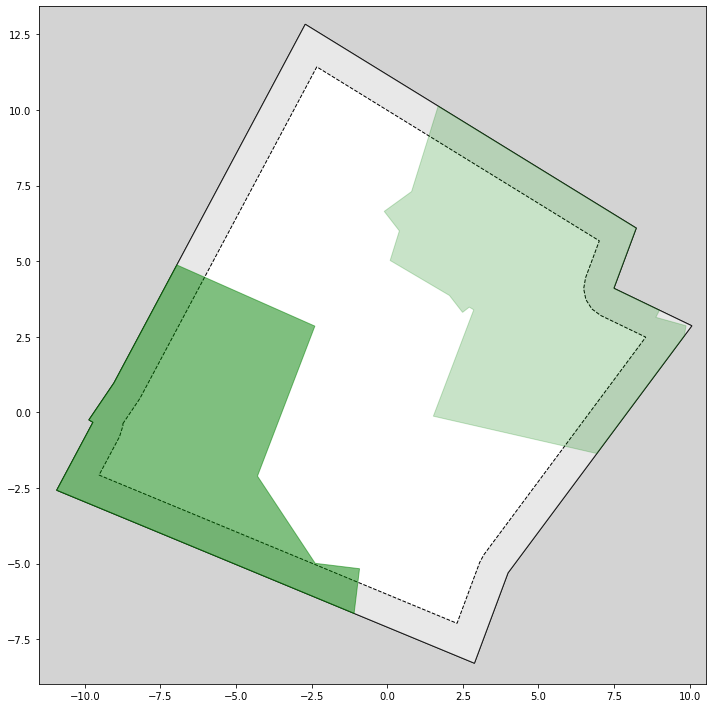

In [4]:
pi2 = PolygonInstance.from_json(file_path="./01d_instance.json")
ax = setup_plot()
plot_polygon_instance(ax, pi2)
plt.show()

In [5]:
t = DmshGrid(full_coverage=False, point_based=True, buffer=0.1, simplification=0.1)
gi = t(pi2)

Optimize grid with CVT-full


<Figure size 432x288 with 0 Axes>

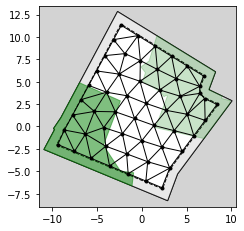

In [6]:
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2)
plot_graph(ax, gi.graph, marker=".", vertex_color="black", edge_color="black")
plt.tight_layout()
plt.show()

Academic license - for non-commercial use only - expires 2021-09-25
Using license file /home/ANONYMOUS_USER/gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 167 rows, 844 columns and 1942 nonzeros
Model fingerprint: 0x6a9b6e05
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 12 columns
Presolve time: 0.01s
Presolved: 167 rows, 832 columns, 1930 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.600000e+01   0.000000e+00      0s
     171    1.9547283e+02   0.000000e+00   0.000000e+00      0s

Solved in 171 iterations and 0.01 seconds
Optimal objective  1.954728278e+02


<Figure size 432x288 with 0 Axes>

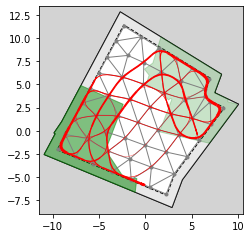

In [7]:
fs = FractionalGridSolver()(gi)
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2)
plot_graph(ax, gi.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_fractional_solution(ax, fs, color="red", linewidth=3.0, zorder=3)
plt.show()

<Figure size 432x288 with 0 Axes>

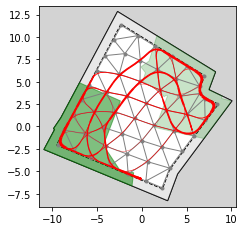

In [8]:
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2)
plot_graph(ax, gi.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_fractional_solution(ax, fs, color="red", linewidth=3.0, zorder=3)
plt.tight_layout()
plt.show()

In [46]:
from pcpptc.grid_solver.cycle_cover.atomic_strip_orientation.atomic_strip import (
    AtomicStripBlueprint,
)
from pcpptc.utils import Point
import math
from pcpptc.grid_solver import PointVertex


def __get_end_points(point, orientation, l):
    if type(point) is PointVertex:
        point = point.point
    p0 = point + l * Point(math.cos(orientation), math.sin(orientation))
    p1 = point + l * Point(
        math.cos(orientation + math.pi), math.sin(orientation + math.pi)
    )
    return p0, p1


def plot_atomic_strips_at_vertex(
    ax, p: PointVertex, o: float, n: int, dominant: bool, l: float, d: float
):
    if n == 2:
        p0, p1 = __get_end_points(p, o + 0.5 * math.pi, d)
        plot_atomic_strips_at_vertex(ax, p0, o, 1, dominant, l, d)
        plot_atomic_strips_at_vertex(ax, p1, o, 1, False, l, d)
    elif n == 1:
        p0, p1 = __get_end_points(p, o, l)
        if dominant:
            ax.plot(
                [p0.x, p1.x],
                [p0.y, p1.y],
                c="red",
                ls="-",
                zorder=4,
                marker=".",
                lw=4.5,
                markersize=15,
            )
        else:
            ax.plot(
                [p0.x, p1.x],
                [p0.y, p1.y],
                c="orange",
                ls="-",
                zorder=3,
                marker=".",
                lw=4,
                markersize=15,
            )
            # pass
    else:
        raise NotImplementedError()


def _group_atomic_strips(atomic_strips: list):
    def identical(o0: AtomicStripBlueprint, o1):
        o0 = (o0.orientation) % math.pi
        o1 = (o1.orientation) % math.pi
        eps = 0.2
        if min(o0, o1) < eps and max(o0, o1) > math.pi - eps:
            o0, o1 = math.pi - max(o0, o1), min(o0, o1)
        return abs(o0 - o1) < eps

    for i, a in enumerate(atomic_strips):
        if all(not identical(a, a_) for a_ in atomic_strips[:i]):
            o = [a_ for a_ in atomic_strips if identical(a, a_)]
            yield a.orientation, len(o), any(o_.has_penalty() for o_ in o)

Using adaptive strip selection strategy.


<Figure size 432x288 with 0 Axes>

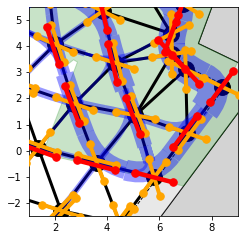

Using adaptive strip selection strategy.


<Figure size 432x288 with 0 Axes>

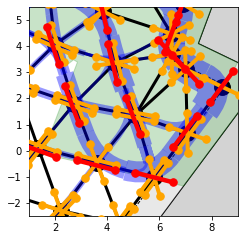

Using adaptive strip selection strategy.


<Figure size 432x288 with 0 Axes>

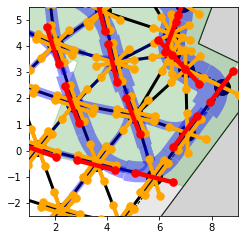

Using adaptive strip selection strategy.


<Figure size 432x288 with 0 Axes>

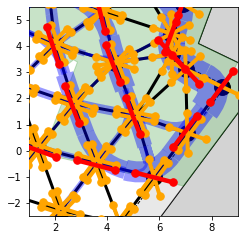

In [49]:
from pcpptc.grid_solver.cycle_cover.atomic_strip_orientation import (
    NeighborBasedStripStrategy,
)

for i in [3, 4, 5, 6]:
    asa = NeighborBasedStripStrategy(i, only_usage_based=False)
    ass = asa(gi, fs)
    ax = setup_plot(figsize=figsize)
    plot_polygon_instance(ax, pi2)
    plot_graph(
        ax,
        gi.graph,
        marker=".",
        vertex_color="black",
        edge_color="black",
        linewidth=3,
        size=1000,
    )
    plot_fractional_solution(ax, fs, color="blue", linewidth=30.0, zorder=3, alpha=0.4)
    plt.xlim(1, 9)
    plt.ylim(-2.5, 5.5)

    for k, v in ass.items():
        for o, n, dominant in _group_atomic_strips(v):
            plot_atomic_strips_at_vertex(ax, k, o, n, dominant, 0.75, 0.1)
    plt.tight_layout()
    plt.savefig(f"05b_stripselection_{i}.pdf")
    plt.show()

Using adaptive strip selection strategy.


<Figure size 432x288 with 0 Axes>

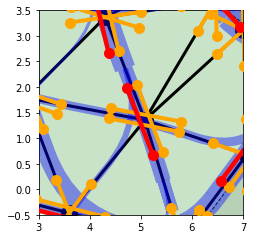

In [40]:
from pcpptc.grid_solver.cycle_cover.atomic_strip_orientation import (
    NeighborBasedStripStrategy,
)

asa = NeighborBasedStripStrategy(4, only_usage_based=False)
ass = asa(gi, fs)
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2)
plot_graph(
    ax,
    gi.graph,
    marker=".",
    vertex_color="black",
    edge_color="black",
    linewidth=3,
    size=1000,
)
plot_fractional_solution(ax, fs, color="blue", linewidth=30.0, zorder=3, alpha=0.4)
plt.xlim(3, 7)
plt.ylim(-0.5, 3.5)


for k, v in ass.items():
    for o, n, dominant in _group_atomic_strips(v):
        plot_atomic_strips_at_vertex(ax, k, o, n, dominant, 0.7, 0.1)
plt.show()

Using adaptive strip selection strategy.


<Figure size 432x288 with 0 Axes>

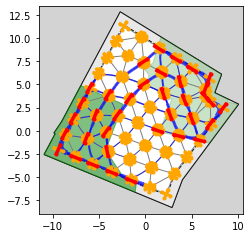

In [11]:
from pcpptc.grid_solver.cycle_cover.atomic_strip_orientation import (
    NeighborBasedStripStrategy,
)

asa = NeighborBasedStripStrategy(6, only_usage_based=False)
ass = asa(gi, fs)
ax = setup_plot(figsize=(3.5, 3.5))
plot_polygon_instance(ax, pi2)
plot_graph(ax, gi.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_fractional_solution(ax, fs, color="blue", linewidth=5.0, zorder=3, alpha=0.7)
# plt.xlim(-10, 0)
# plt.ylim(-5, 5)


for k, v in ass.items():
    for o, n, dominant in _group_atomic_strips(v):
        plot_atomic_strips_at_vertex(ax, k, o, n, dominant, 0.5, 0.1)
plt.show()